# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, contamination_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')

/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
{'lithology': 'dolomie'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
{'lithology': 'dolomie'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
{'lithology': 'dolomie'}
Summary : [Striplog(5 Intervals, start=0.0, stop=26.0)]
|__ID:'BH005'
{'lithology': 'sable'}
{'lithology': 'argile'}
{'lithology': 'marne'}
{'lithology': 'charbon'}
{'lithology': 'dolomie'}
{'lithology': 'schiste'}
Summary : [Striplog(6 Intervals, start=0.0, stop=32.0)]
|__ID:'BH006'
{'litholo

In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne'}),
 1: Component({'lithology': 'charbon'}),
 2: Component({'lithology': 'sable'}),
 3: Component({'lithology': 'argile'}),
 4: Component({'lithology': 'dolomie'}),
 5: Component({'lithology': 'schiste'}),
 6: Component({'lithology': 'calcaire'})}

In [11]:
len(boreholes), len(components)

(10, 7)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-07-05 17:39:43,559 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 17:39:43,560 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-07-05 17:39:43,560 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 17:39:43,561 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-07-05 17:39:43,561 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 17:39:43,562 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-07-05 17:39:43,563 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 17:39:43,563 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-07-05 17:39:43,564 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 17:39:43,564 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("IntervalData")
2021-07-05 17:39:43,566 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 17:39:43,567 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("IntervalData")
2021-07-05 17:39:43,567 INFO sqlalchemy.engine.E

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

## Define project legend(s) and default attribute for representation

In [16]:
p = Project(session, lexicon=lexicon_memoris, repr_attribute='lithology',
            legend_dict={'lithology':{'legend':lithology_memoris}, 'pollutant':{'legend':contamination_memoris}},)

2021-07-05 17:39:43,618 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 17:39:43,622 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 17:39:43,623 INFO sqlalchemy.engine.Engine [generated in 0.00088s] ()


In [17]:
p.add_components(components)

2021-07-05 17:39:43,630 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-07-05 17:39:43,631 INFO sqlalchemy.engine.Engine [generated in 0.00089s] ((0, 'Marne'), (1, 'Charbon'), (2, 'Sable'), (3, 'Argile'), (4, 'Dolomie'), (5, 'Schiste'), (6, 'Calcaire'))
2021-07-05 17:39:43,633 INFO sqlalchemy.engine.Engine COMMIT
2021-07-05 17:39:43,638 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 17:39:43,639 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 17:39:43,640 INFO sqlalchemy.engine.Engine [cached since 0.01798s ago] ()


Add boreholes into the project

In [18]:
for bh in boreholes:
    p.add_borehole(bh)

2021-07-05 17:39:43,649 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-05 17:39:43,650 INFO sqlalchemy.engine.Engine [generated in 0.00124s] ('BH001', 28.0, 0.43)
2021-07-05 17:39:43,654 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-05 17:39:43,654 INFO sqlalchemy.engine.Engine [generated in 0.00079s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-07-05 17:39:43,656 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-05 17:39:43,657 INFO sqlalchemy.e

2021-07-05 17:39:43,737 INFO sqlalchemy.engine.Engine [cached since 0.08155s ago] ((4, 'BH002', 0, 'Sable VI', 8, 9, None), (5, 'BH002', 1, 'Argile VS', 10, 11, None), (6, 'BH002', 2, 'Marne VR', 12, 13, None), (7, 'BH002', 3, 'Charbon VS', 14, 15, None), (8, 'BH002', 4, 'Dolomie VI', 16, 17, None))
2021-07-05 17:39:43,739 INFO sqlalchemy.engine.Engine COMMIT
2021-07-05 17:39:43,743 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 17:39:43,744 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 17:39:43,745 INFO sqlalchemy.engine.Engine [cached since 0.1234s ago] ()
2021-07-05 17:39:43,747 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Interva

2021-07-05 17:39:43,803 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-05 17:39:43,804 INFO sqlalchemy.engine.Engine [cached since 0.148s ago] ((9, 'BH003', 0, 'Sable VS', 18, 19, None), (10, 'BH003', 1, 'Argile VR', 20, 21, None), (11, 'BH003', 2, 'Marne VR', 22, 23, None), (12, 'BH003', 3, 'Charbon VI', 24, 25, None), (13, 'BH003', 4, 'Dolomie VR', 26, 27, None))
2021-07-05 17:39:43,806 INFO sqlalchemy.engine.Engine COMMIT
2021-07-05 17:39:43,810 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 17:39:43,811 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 17:39:43,812 INFO sqlalchemy.engine.Engine [cached since 0.1896s ago] ()
2021-07-05 17:39:43,814 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Inter

2021-07-05 17:39:43,863 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-05 17:39:43,863 INFO sqlalchemy.engine.Engine [cached since 0.2073s ago] ((14, 'BH004', 0, 'Sable VI', 28, 29, None), (15, 'BH004', 1, 'Argile VI', 30, 31, None), (16, 'BH004', 2, 'Marne VR', 32, 33, None), (17, 'BH004', 3, 'Charbon VR', 34, 35, None), (18, 'BH004', 4, 'Dolomie VI', 36, 37, None))
2021-07-05 17:39:43,864 INFO sqlalchemy.engine.Engine COMMIT
2021-07-05 17:39:43,868 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 17:39:43,869 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 17:39:43,870 INFO sqlalchemy.engine.Engine [cached since 0.2481s ago] ()
2021-07-05 17:39:43,872 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Int

2021-07-05 17:39:43,932 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-05 17:39:43,933 INFO sqlalchemy.engine.Engine [cached since 0.2772s ago] ((19, 'BH005', 0, 'Sable VS', 38, 39, None), (20, 'BH005', 1, 'Argile VS', 40, 41, None), (21, 'BH005', 2, 'Marne VI', 42, 43, None), (22, 'BH005', 3, 'Charbon VI', 44, 45, None), (23, 'BH005', 4, 'Dolomie VI', 46, 47, None), (24, 'BH005', 5, 'Schiste Cl', 48, 49, None))
2021-07-05 17:39:43,935 INFO sqlalchemy.engine.Engine COMMIT
2021-07-05 17:39:43,939 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 17:39:43,940 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 17:39:43,941 INFO sqlalchemy.engine.Engine [cached since 0.3189s ago] ()
2021-07-05 17:39:43,943 INFO sqlalchemy.engine.Engine

lithology_indices: [0 1 2 3 4 5]
pollutant_indices: [0 0 0 0 0 0]
Borehole geometry created successfully !
2021-07-05 17:39:44,002 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-05 17:39:44,003 INFO sqlalchemy.engine.Engine [cached since 0.2741s ago] (97.0, 'BH005')
2021-07-05 17:39:44,007 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-05 17:39:44,008 INFO sqlalchemy.engine.Engine [cached since 0.3588s ago] ('BH006', 26.0, 0.31)
2021-07-05 17:39:44,009 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-05 17:39:44,010 INFO sqlalchemy.engine.Engine [cached since 0.3565s ago] ((50, 101.0, 101.0, 101.0, 152375.0, 121002.0), (51, 100.0, 100.0, 100.0, 152375.0, 121002.0), (52, 100.0, 100.0, 100.0, 152375.0, 121002.0), (53, 98.0, 98.0, 98.0, 152375.0, 121002.0), (54, 98.0, 98.0, 98.0, 152375.0, 121002.0), (55, 92.0, 92.0,

lithology_indices: [0 1 2 3 4]
pollutant_indices: [0 0 0 0 0]
Borehole geometry created successfully !
2021-07-05 17:39:44,075 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-05 17:39:44,075 INFO sqlalchemy.engine.Engine [cached since 0.3459s ago] (100.0, 'BH006')
2021-07-05 17:39:44,076 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-05 17:39:44,076 INFO sqlalchemy.engine.Engine [cached since 0.427s ago] ('BH007', 45.0, 0.57)
2021-07-05 17:39:44,078 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-05 17:39:44,078 INFO sqlalchemy.engine.Engine [cached since 0.425s ago] ((60, 101.0, 101.0, 101.0, 152794.0, 121111.0), (61, 97.0, 97.0, 97.0, 152794.0, 121111.0), (62, 97.0, 97.0, 97.0, 152794.0, 121111.0), (63, 93.0, 93.0, 93.0, 152794.0, 121111.0), (64, 93.0, 93.0, 93.0, 152794.0, 121111.0), (65, 83.0, 83.0, 83.0, 1527

[Component({'lithology': 'sable'})]
[Component({'lithology': 'sable'}), Component({'pollutant': 'Inconnu'})]
[Component({'lithology': 'argile'})]
[Component({'lithology': 'argile'}), Component({'pollutant': 'Inconnu'})]
[Component({'lithology': 'marne'})]
[Component({'lithology': 'marne'}), Component({'pollutant': 'Inconnu'})]
[Component({'lithology': 'charbon'})]
[Component({'lithology': 'charbon'}), Component({'pollutant': 'Inconnu'})]
[Component({'lithology': 'dolomie'})]
[Component({'lithology': 'dolomie'}), Component({'pollutant': 'Inconnu'})]
[Component({'lithology': 'calcaire'})]
[Component({'lithology': 'calcaire'}), Component({'pollutant': 'Inconnu'})]
++++++++++++ BH007 pollutant ++++++++++++++++++++++++++++
['Inconnu'] 
 ['Inconnu']
build_leg_func: vr
build_leg_func: vs
build_leg_func: vi
build_leg_func: inconnu
lithology_indices: [0 1 2 3 4 5]
pollutant_indices: [0 0 0 0 0 0]
Borehole geometry created successfully !
2021-07-05 17:39:44,146 INFO sqlalchemy.engine.Engine UPDA

[Component({'lithology': 'marne'})]
[Component({'lithology': 'marne'}), Component({'pollutant': 'Inconnu'})]
[Component({'lithology': 'charbon'})]
[Component({'lithology': 'charbon'}), Component({'pollutant': 'Inconnu'})]
[Component({'lithology': 'dolomie'})]
[Component({'lithology': 'dolomie'}), Component({'pollutant': 'Inconnu'})]
++++++++++++ BH008 pollutant ++++++++++++++++++++++++++++
['Inconnu'] 
 ['Inconnu']
build_leg_func: vr
build_leg_func: vs
build_leg_func: vi
build_leg_func: inconnu
lithology_indices: [0 1 2 3 4]
pollutant_indices: [0 0 0 0 0]
Borehole geometry created successfully !
2021-07-05 17:39:44,214 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-05 17:39:44,216 INFO sqlalchemy.engine.Engine [cached since 0.4863s ago] (98.0, 'BH008')
2021-07-05 17:39:44,217 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-05 17:39:44,217 INFO sqlalchemy.engine.Engine [cached since 0.5

build_leg_func: vs
build_leg_func: vi
build_leg_func: inconnu
lithology_indices: [0 1 2 3 4]
pollutant_indices: [0 0 0 0 0]
Borehole geometry created successfully !
2021-07-05 17:39:44,281 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-05 17:39:44,282 INFO sqlalchemy.engine.Engine [cached since 0.5531s ago] (94.0, 'BH009')
2021-07-05 17:39:44,284 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-05 17:39:44,285 INFO sqlalchemy.engine.Engine [cached since 0.6353s ago] ('BH10', 14.0, 0.31)
2021-07-05 17:39:44,286 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-05 17:39:44,287 INFO sqlalchemy.engine.Engine [cached since 0.6336s ago] ((92, 100.0, 100.0, 100.0, 152315.0, 121754.0), (93, 95.0, 95.0, 95.0, 152315.0, 121754.0), (94, 95.0, 95.0, 95.0, 152315.0, 121754.0), (95, 91.0, 91.0, 91.0, 152315.0, 121754.0), (96, 91.0

In [19]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-07-05 17:39:44,353 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-05 17:39:44,354 INFO sqlalchemy.engine.Engine [cached since 0.6244s ago] (95.0, 'BH10')
2021-07-05 17:39:44,356 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-07-05 17:39:44,356 INFO sqlalchemy.engine.Engine [generated in 0.00076s] ((0, 2, ''), (1, 3, ''), (2, 0, ''), (3, 1, ''), (4, 2, ''), (5, 3, ''), (6, 0, ''), (7, 1, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 0, ''), (49, 1, ''))
2021-07-05 17:39:44,358 INFO sqlalchemy.engine.Engine COMMIT
2021-07-05 17:39:44,361 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 17:39:44,363 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 17:39:44,364 INFO sqlalchemy.engine.Engine [cached since

In [20]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-07-05 17:39:44,372 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [21]:
p.boreholes

2021-07-05 17:39:44,380 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 17:39:44,383 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-07-05 17:39:44,383 INFO sqlalchemy.engine.Engine [generated in 0.00067s] ('BH001',)
2021-07-05 17:39:44,385 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-05 17:39:44,385 INFO sqlalchemy.engine.Engine [cached since 0.7124s ago] ('BH001',)
2021-07-05 17:39:44,386 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_

2021-07-05 17:39:44,427 INFO sqlalchemy.engine.Engine [cached since 0.7539s ago] ('BH10',)


[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=4)]

In [22]:
p.refresh(verbose=False)

2021-07-05 17:39:44,436 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 17:39:44,437 INFO sqlalchemy.engine.Engine [cached since 0.8151s ago] ()


In [23]:
session.close()

2021-07-05 17:39:44,443 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

In [24]:
attributes = list(p.legend_dict.keys())
attributes

['lithology', 'pollutant']

In [25]:
p.update_legend_cmap(update_all_attrib=True) #[0][attributes[0]]['cmap']

++++++++++++ BH001 lithology ++++++++++++++++++++++++++++
['sable', 'argile', 'marne', 'charbon'] 
 ['sable', 'argile', 'marne', 'charbon']
build_leg_func: matériau(?:x)? meuble(?:s)?
build_leg_func: alluvion(?:s)?
build_leg_func: boue(?:s)?
build_leg_func: remblai(?:s)?
build_leg_func: tourbe(?:s)?
build_leg_func: gypse(?:s)?
build_leg_func: houille(?:s)?
build_leg_func: limon(?:s)?
build_leg_func: sable(?:s)?
build_leg_func: gravier(?:s)?
build_leg_func: silt(?:s)?
build_leg_func: argile(?:s)?
build_leg_func: bentonite(?:s)?
build_leg_func: schiste(?:s)?
build_leg_func: argilite(?:s)?
build_leg_func: siltite(?:s)?
build_leg_func: tuffeau(?:s)?
build_leg_func: silex
build_leg_func: conglomérat(?:s)?
build_leg_func: carbonate(?:s)?
build_leg_func: calcaire(?:s)?
build_leg_func: dolomite(?:s)?
build_leg_func: dolomie(?:s)?
build_leg_func: craie(?:s)?
build_leg_func: chert(?:s)?
build_leg_func: charbon(?:s)?
build_leg_func: marne(?:s)?
build_leg_func: inconnu
++++++++++++ BH002 lithology

build_leg_func: gravier(?:s)?
build_leg_func: silt(?:s)?
build_leg_func: argile(?:s)?
build_leg_func: bentonite(?:s)?
build_leg_func: schiste(?:s)?
build_leg_func: argilite(?:s)?
build_leg_func: siltite(?:s)?
build_leg_func: tuffeau(?:s)?
build_leg_func: silex
build_leg_func: conglomérat(?:s)?
build_leg_func: carbonate(?:s)?
build_leg_func: calcaire(?:s)?
build_leg_func: dolomite(?:s)?
build_leg_func: dolomie(?:s)?
build_leg_func: craie(?:s)?
build_leg_func: chert(?:s)?
build_leg_func: charbon(?:s)?
build_leg_func: marne(?:s)?
build_leg_func: inconnu
++++++++++++ BH10 lithology ++++++++++++++++++++++++++++
['sable', 'argile', 'marne', 'charbon'] 
 ['sable', 'argile', 'marne', 'charbon', 'dolomie', 'schiste', 'calcaire']
build_leg_func: matériau(?:x)? meuble(?:s)?
build_leg_func: alluvion(?:s)?
build_leg_func: boue(?:s)?
build_leg_func: remblai(?:s)?
build_leg_func: tourbe(?:s)?
build_leg_func: gypse(?:s)?
build_leg_func: houille(?:s)?
build_leg_func: limon(?:s)?
build_leg_func: sable(?

({'lithology': {'legend': Legend(Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
   Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})})
   Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})})
   Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})})
   Decor({'_colour': '#fdaffe', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})})
   Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schiste'})})
   Decor({'_colour': '#149eff', 'width': 3, 'hatch': "'='", 'component': Component({'lithology': 'calcaire'})})),
   'cmap': <matplotlib.colors.ListedColormap at 0x7f8addc3dc40>,
   'values': ['sable',
    'argile',
    'marne',
    'charbon',
    'dolomie',
    'schiste',
    'calcaire']},
  'pollutant': {

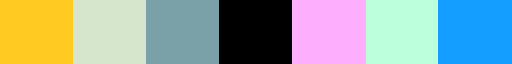

In [26]:
p.legend_dict[attributes[0]]['cmap']

## Display one object (attribute = 'lithology')

In [27]:
bh = 1
p.boreholes_3d[bh]._components

[Component({'lithology': 'sable'}),
 Component({'lithology': 'argile'}),
 Component({'lithology': 'marne'}),
 Component({'lithology': 'charbon'}),
 Component({'lithology': 'dolomie'})]

0
0
0
0
0


/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


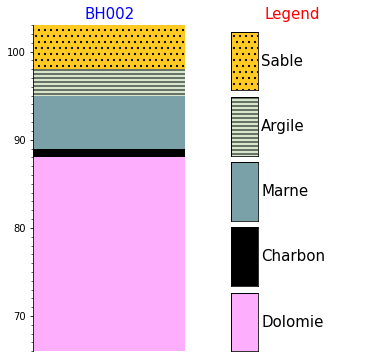

In [28]:
p.boreholes_3d[bh].log_plot()

In [29]:
sargs = dict(title='test', title_font_size=30, label_font_size=12, n_labels=0,
             fmt="%.2f", font_family="arial", color='k',interactive=True, 
             vertical=True, italic=True, shadow=False,)

In [30]:
bh=1
p.boreholes_3d[bh].plot3d(custom_legend=False, scalar_bar_args=sargs)

5 0.8 {0.4: 'Sable', 1.2000000000000002: 'Argile', 2.0: 'Marne', 2.8000000000000003: 'Charbon', 3.6: 'Dolomie'}


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot with another attribute

In [31]:
p.legend_dict

{'lithology': {'legend': Legend(Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
  Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})})
  Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})})
  Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})})
  Decor({'_colour': '#fdaffe', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})})
  Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schiste'})})
  Decor({'_colour': '#149eff', 'width': 3, 'hatch': "'='", 'component': Component({'lithology': 'calcaire'})})),
  'cmap': <matplotlib.colors.ListedColormap at 0x7f8addc3dc40>,
  'values': ['sable',
   'argile',
   'marne',
   'charbon',
   'dolomie',
   'schiste',
   'calcaire']},
 'pollutant': {'legend': Legend

1
1
1
1
1


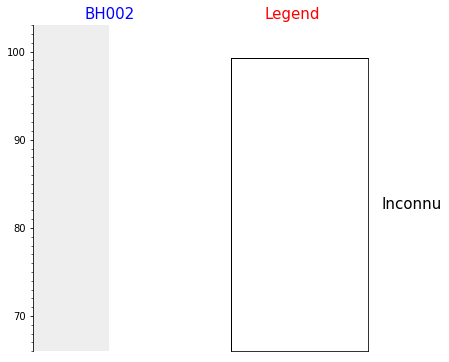

In [32]:
p.boreholes_3d[bh].log_plot(repr_attribute=attributes[1])

In [33]:
p.boreholes_3d[bh].plot3d(repr_attribute=attributes[1])

1 0.0 {0.0: 'Inconnu'}


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Display project boreholes

In [34]:
p.plot3d(repr_attribute=attributes[0], labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon', 3.8571428571428568: 'Dolomie', 4.7142857142857135: 'Schiste', 5.571428571428571: 'Calcaire'}
7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon', 3.8571428571428568: 'Dolomie', 4.7142857142857135: 'Schiste', 5.571428571428571: 'Calcaire'}
7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon', 3.8571428571428568: 'Dolomie', 4.7142857142857135: 'Schiste', 5.571428571428571: 'Calcaire'}
7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon', 3.8571428571428568: 'Dolomie', 4.7142857142857135: 'Schiste', 5.571428571428571: 'Calcaire'}
7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon'

### Boreholes in 3D using X3D for interaction within the notebook